# Machine Learning and Statistics Project 2019

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import keras as kr

import statsmodels.api as sm
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

from IPython.core.display import HTML

import sklearn
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score

from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense

from termcolor import colored
import pandas_profiling as pp

import xgboost
import shap

# Used to Evaluate our model
import math
import time

# Nicely formatted plots
%matplotlib inline

# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
bhp = load_boston()
prices = bhp.target # Define the target values
features = bhp.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = bhp.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target

Using TensorFlow backend.


<hr>

## Explore the Data

I explored the dataset using <u>print(bhp)</u> but the output is not exactly easy to interpret. In a real-world situation, offering clients or an employer this output would not be very professional. It can be easy for a person to lose interest or miss important aspects of the output.

In [2]:
# Key things to note is data, target, feature_names as I will use these during the project
print(bhp)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

***
We can seen form the above output that it is not exactly user readable. 

In the cell below I have outputted the same contents as above but in a structured and attractive way. It is very easy to understand what the dataset consists of by using <u>.DESCR</u>. I have also outputted the number of houses using <u>data.shape[0]</u> and the number of columns/features using <u>data.shape[1].</u> <i>(range(Y.shape[0])&rdquo;? and Ananthan, 2019)</i>


<i>Key things to note from the data set details below are :</i>
    1. The number of Instances and Attributes. 
    2. The column headings and what each column represents.
    3. Missing values?. I will check for this using a Python command to confirm.
    4. Creators.   
    5. Attribute 14(MEDV) will be the target

In [3]:
# Describe the Dataset
print (bhp.DESCR)

print ("---------------------------------------------")
print ("Summary\n")

# Number of houses
houses = data.shape[0]

# Number of features
features = data.shape[1]

print ("Number of Houses          : ", houses)
print ("Number of Housing Features: ", features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***

### Peek at the data

The code below will output n number of rows from the top and bottom of the Boston Housing Dataset. In the below example I have specified three. If no number is entered it will output five rows by default. By implementing this we can see the amount of columns along with the column names, we can see what variable type is used (Boston Data set is outputting boolean variable types), and we can see the row count.

In [4]:
# View the top of the dataset.
print(colored("\n\n                         View at the frist three rows of the dataset ", 'red'))
print((boston.head(3)))


# View end of the dataset.
print(colored("\n\n                         View at the last five rows of the dataset \n", 'red'))
print((boston.tail()))



                         View at the frist three rows of the dataset 
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


                         View at the last five rows of the dataset 

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050

***

### Statistical Summary.
***
The python "describe" method is a great option to use that will display the median, mean, min, max, standard deviations etc. It is a good idea to to create this as it is easy to view and can indicate any unexpected or surprising distributions in the dataset. Note that I have taken the transform of the result by adding a .T to the output, this in turn will swaps the rows and columns.

In [5]:
# Statistical details of each column. How many rows, highest & lowest in each column etc
print(boston.describe().T)

print("\n \n \n")

print(colored("Check for null values within the dataset \n", "red"))
# Check for any null or missing values, data types etc.
print(boston.info())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

## Statistical Analysis

By using the NumPy library I am able to calculate a few meaningful statistics about the dataset around pricing as seen below.

In [6]:
# Number of houses
total_houses = data.shape[0]

# Number of features
total_features = data.shape[1]

# Max price
max_price = np.amax(prices)

# Minimum price
min_price = np.min(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation
std_dev = np.std(prices)

# Calculate and show statistics
print ("House prices in $1000's\n")
print ("Total houses       :", total_houses)
print ("Total features     :", total_features)
print ("Minimum price      : ${:,.0f}".format(min_price*1000))
print ("Maximum price      : ${:,.0f}".format(max_price*1000))
print ("Mean price         : ${:,.2f}".format(mean_price*1000))
print ("Median price       : ${:,.2f}".format(median_price*1000))
print ("Standard deviation : ${:,.2f}".format(std_dev*1000))

House prices in $1000's

Total houses       : 506
Total features     : 13
Minimum price      : $5,000
Maximum price      : $50,000
Mean price         : $22,532.81
Median price       : $21,200.00
Standard deviation : $9,188.01


***
### Histogram

The histogram is very useful when we want to explore our data and give us an understanding of the distribution of the data set. We can set the bin size (by default this is set to 20). It is a good idea to change the bin size as it will output the graph in different ways and might potentially display something that is hidden.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F88C62808>


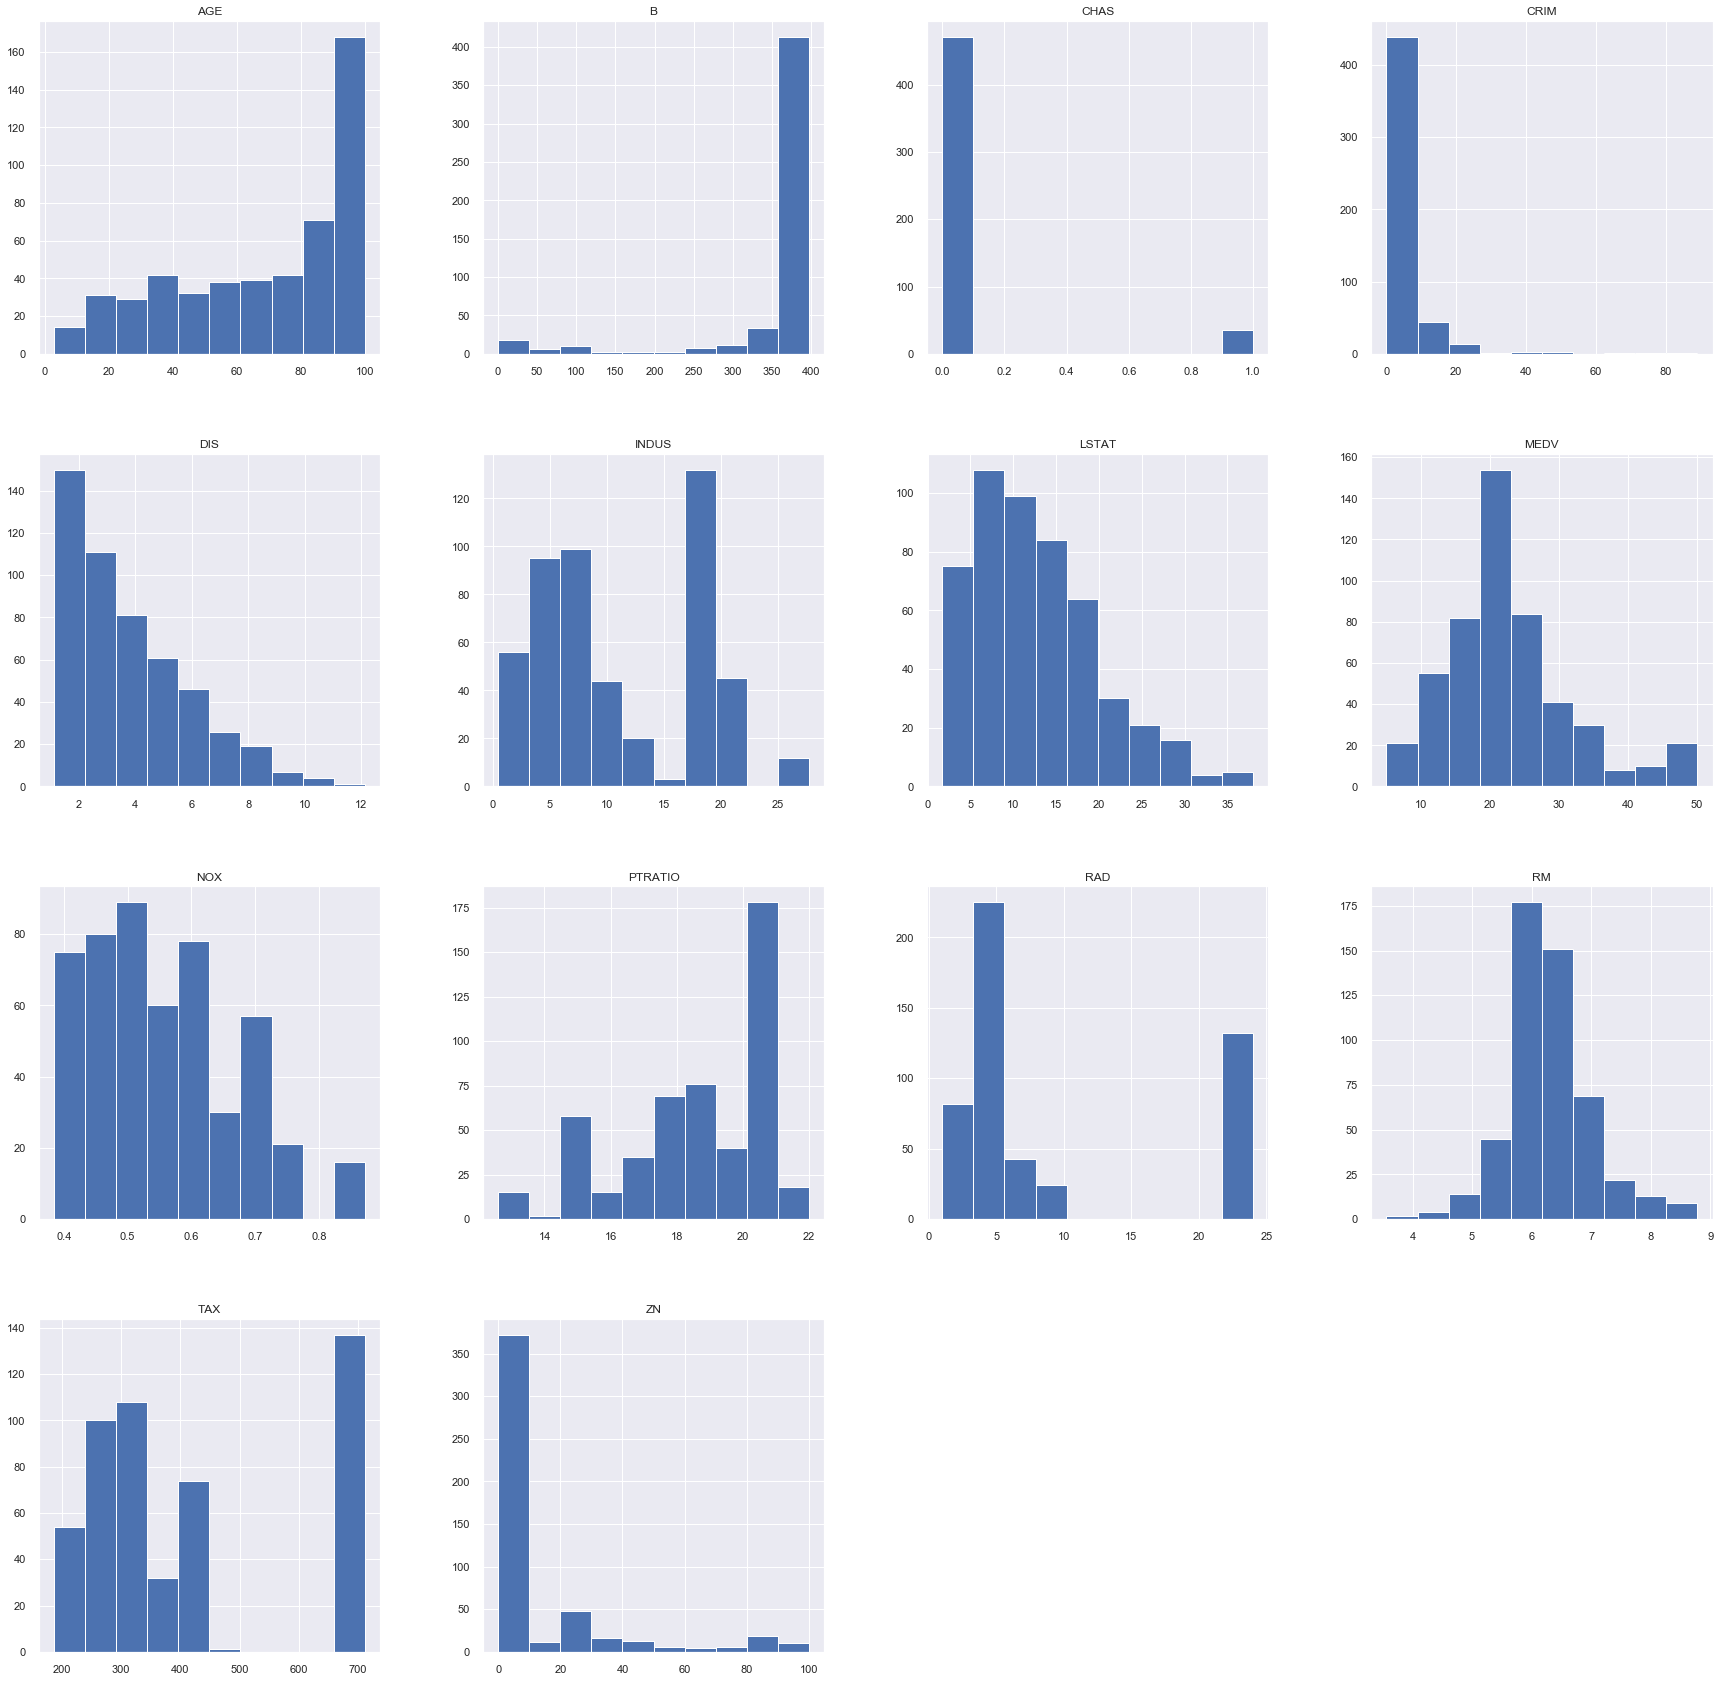

In [49]:
print(boston.hist(bins=10, figsize=(30, 30)))

***
### Heatmap

A heatmap is a very handy tool we can use to view the data in 2-dimensional form. A quick overview of the heatmap indicated that MEDV is strongly correlated to LSTAT

From the correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list. You can find the reason behind this here.

AxesSubplot(0.125,0.125;0.62x0.755)


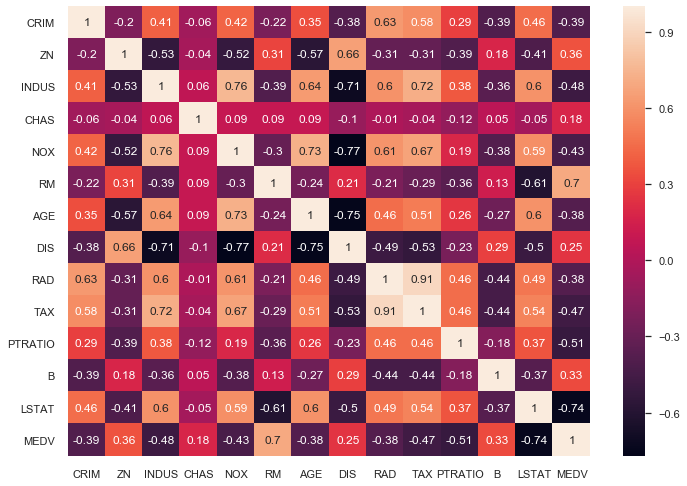

In [50]:
# Generate Heatmap
print(sns.heatmap(boston.corr().round(2), annot=True))

## Profiling Report

<i>For profiling we first need to go to the command line and type <u>"install -c conda-forge pandas-profiling".</u></i>
    
Profiling is a simple and quick way to explore the dataset and is a better than the previous methods such as .describe() and .info() as these offer a very basic overview and with large datasets profiling is a much better option. Pandas Profiling function extends the pandas DataFrame for quick data analysis. It displays a lot of information with a single line of code. This display is very user friendly as it is displayed like a report that interactive. (Medium, 2019)

In [9]:
# Print the profiling report
pp.ProfileReport(boston)

## Find total of houses that are along the Charles river and those that aren’t.

In this section I will analyse whether there is a difference in median house prices between houses that are along the Charles river and those that aren’t. I will use two columns to find the median price, the first column will be CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) and the second column will be MEDV (Median value of owner-occupied homes in $1000's). I will also use statsmodels.api to output the OLS regression results.

From my findings I can see that the median house price along the river is 23.30 (In 000's) and the median house price not along the river is 20.90 (In 000's).

In [10]:
# Find total of houses that are along the Charles river and those that aren’t.

# Find houses either along the river. ['CHAS']==1] means that they are beside the river
chas1=boston[boston['CHAS']==1]['MEDV']

# Pull columns to generate OLS model
x=boston[boston['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
y=boston[boston['CHAS']==1]['MEDV']


# Find houses either not along the river ['CHAS']==1] means that they are not beside the river
chas0=boston[boston['CHAS']==0]['MEDV'] 

# Pull columns  OLS model
z=boston[boston['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
a=boston[boston['CHAS']==0]['MEDV']

#---------------------------------------------------------------------------------------------------------#
# Find the total number of house along the charles river
check1 = (boston.CHAS == 1).sum()

# Find the median of MEDV where CHAS == 1
medianMEDV1 = (boston.loc[boston["CHAS"] == 1]["MEDV"]).median()
print ("Total number of houses along the river is = ",(check1), ", and the median price along the river in $1000's : ${0:.2f}".format(medianMEDV1), "\n")

# OLS Regression for houses beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

# Find the total number of house not along the charles river
check0 = (boston.CHAS != 1).sum()

# find and print the locations where CHAS = 0. Will edit this out for viewing reason 
check = (boston.loc[boston['CHAS'] != 1])
#print("Position numbers of these 0.0 results are : \n",(check.CHAS))

# Find the median of MEDV where CHAS == 0
medianMEDV0 = (boston.loc[boston["CHAS"] != 1]["MEDV"]).median()
print ("\n\n\nTotal number of houses not along the river is = ",(check0), ", and the median price not along the river in $1000's : ${0:.2f}".format(medianMEDV0),"\n")


# OLS Regression for houses not beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(a, z).fit()
predictions = model.predict(z)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

Total number of houses along the river is =  35 , and the median price along the river in $1000's : $23.30 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:21:10   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

***
### T Test

The t test is a measurement of whether the average (expected) value will differ significantly across the samples provided. A large p-value (greater than 0.05 or 0.1) then we cannot reject the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

The result of the ttest I ran is 7.390623170519905e-05 or 0.00007390623170519905(real number). It is clear to see that the p-value is below 1 percent, this implies high significance we can reject the null hypothesis. 

In [11]:
# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.ttest_ind(chas1, chas0))

# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.stats.mannwhitneyu (chas1,chas0))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)
MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)


***
### Scatter Plot & RegPlot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables. This association is called a correlation (Chartio, 2019). Please note the starting points of the scale because it does not start a (0,0). 

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

I have also used Seaborns plotting library to generate a regplot from the scatterplot created as it will automatically add a linear regression fit. Linear Regression is a way to find the best linear relationship or line of best fit between two variables. With a line of best fit given a dependent variable (x), we could predict our independent variable (y).
The goal of linear regression is to find the line of best fit for our data that will result in the predicted y’s to be as close to our known y values we give it. Below is a helpful image of the equation for linear regression:

DECRIBE THE CATPLOT

It is clear to see from the scatterplot and regplot that whether a house is closer or not to the river or not has not significant pattern as the house prices in both areas range high to low.

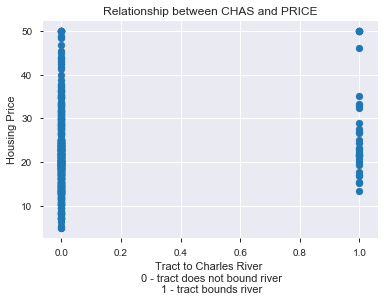

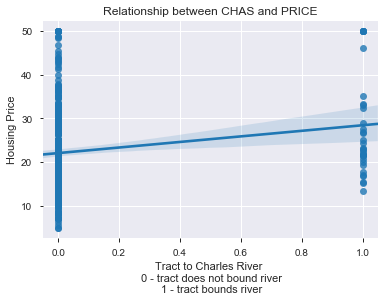

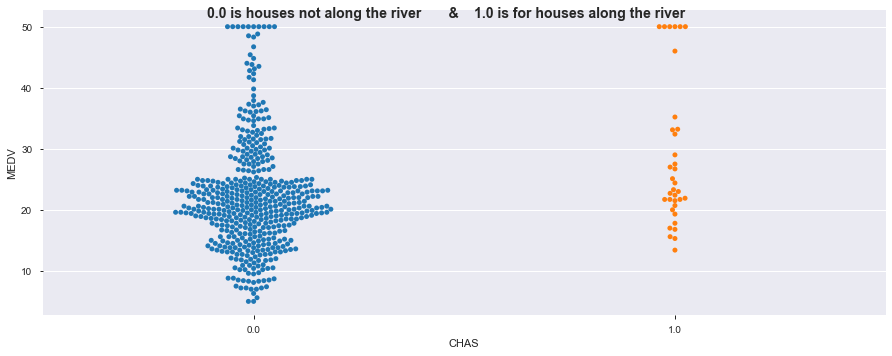

In [12]:
#scatter plot between *CHAS* and *PRICE*
plt.scatter(boston.CHAS, boston.MEDV)
plt.xlabel('Tract to Charles River \n 0 - tract does not bound river\n 1 - tract bounds river')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and PRICE')
plt.show()

sns.regplot(y="MEDV", x="CHAS", data=boston, fit_reg = True)
plt.xlabel('Tract to Charles River \n 0 - tract does not bound river\n 1 - tract bounds river')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and PRICE')
plt.show()

# Lets view the amount of houses that are either beside or not beside the river
colours = ["blue", "red"] # Define Plot Colours 

# Add kind. height and aspect to position accross the page
sns.catplot(x="CHAS", y="MEDV", data=boston, kind="swarm", height=5, aspect=2.5)
suptitle('0.0 is houses not along the river       &    1.0 is for houses along the river', fontsize=14, fontweight='bold')
plt.show()

***
# Keras

Pandas allow us to use df.corr() to find the pairwise correlation within the dataframe. If any of the values are empty .corr will identify them and automatically excluded them from the output. For any non-numeric data type columns in the dataframe it is ignored.

Large positive scores indicate a strong positive (that is, in the same direction) correlation.As expected, we see maximum values of 1 on the diagonal.

In [13]:
boston.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

***

### Split the dataset
The next part of this project I want to train it with the help of Kearas. The most common split ratio is 70:30 which I will implement in this project, if we were using a small datasets a ratio of 90:10 would be sufficient. Training data will be used to train the model while the unseen data is used to validate the model performance. (Singh and scikit-learn, 2019). Splitting the data set into X(input attribute) an y(output attribute) will enable me to model the dataset much easier.
    
This is given as a fraction, is used to decides the size of the data that will be split as the test dataset. For example, I have used 0.2 as the value, the dataset will be split 20% as the test dataset.(Medium, 2019)

I have used random_state and I have passed an integer values. This will act as the seed for the random number generator when the spilt occurs. We can however pass an instance of the RandomState class, and in turn this will become the number generator. If we have not used/ passsed anything, RandomState will be used by np.random. (Medium, 2019)

Once the data is split 70:30 I have added a print statement to check if the was successful. The dataset has 506 data points. The output of 354:152 (70:30) is good and what we want to see.

When we are working with featured that use different scales and ranges it is considered to be a good idea to normalise them. To do this on I subtract the mean of the feature and divide by the standard deviation, this process will need to be completed on all features. The model might work successfully without feature normalization but can in turn become a more difficult process with regards to training, and it will also make the resulting model much more dependant on the choice of units used in the input.<i>(Colab.research.google.com, 2019)</i>

In [14]:
X = boston.iloc[:,0:13] #assign the first 13 columns
y = boston.iloc[:,13]

# split data into training and test data and Print to screen if split completed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print("Training and testing split was successful.\n")


# Normalize features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


# check if the data has split 70 / 30, store calcs in x and y to be formatted to display percent output
x = (float(X_train.shape[0] / float(X.shape[0]))) 
print("X_Train size is : ",X_train["CRIM"].count(), "which is  : " +"{:.2%}".format(x))

y = (float(X_test.shape[0] / float(X.shape[0])))
print("X_Test  size is : ",X_test["CRIM"].count(),"which is  : " +"{:.2%}".format(y))


# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

print(X_train.shape, X_test.shape, y_train.shape,  y_test.shape)

Training and testing split was successful.

X_Train size is :  354 which is  : 69.96%
X_Test  size is :  152 which is  : 30.04%
(354, 13) (152, 13) (354,) (152,)


### Define Model

Below I have created a Keras Sequential model. We can describe a Sequential model as a linear stack of layers. I built the model by passing a list instances to the constructor as shown in the cell below.
<br>

In the cell below we can see that the first layer is called input_shape. We need to specify this first so the model will know what shape to expect on input. 
<br>

Fully connected layers are defined by using the Dense class. Using this class I have specified the number nodes in the layer as the first argument then specify the activation function using the activation argument.<br>

I have used RELU activation function because the performance is much better as opposed to Tanh for example.(Brownlee, 2019)
<br>

We can piece it all together by adding each layer:

* The  model expects rows of data with 13 variables.
    * Represented as the input_dim=13 argument
    
* The first hidden layer has 150 nodes and uses the relu activation function and I have assigned it name='dense_1' for easier viewing on output. 

* The second hidden layer has 75 nodes (Half of layer 1) and uses the relu activation function and I have assigned it name='dense_2' for easier viewing on output. 

* The output layer has one node and I have not specified any activation function so it will use Linear.


In [15]:
# Build our model

# Used (Faroit.com, 2019) to help build the model by passing a list instances to the constructor
# Sequential model with two densely connected hidden layers, and an output layer. 

model = Sequential([Dense(128, input_dim=(13), activation='relu', name='Dense_1'),
                    Dense(64, activation='relu', name='Dense_2'),
                    Dense(1, name='Dense_Output')])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compile Model

Compiling the model uses the TensorFlow numerical library and is where the learning processes is configured. I have defined the optimizer as the efficient stochastic gradient descent algorithm “adam“. The loss function will be used to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [16]:
# The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
Dense_Output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


###  Fit Model

Execute the model on the data. To train the model I have called the fit() function, this function passes NumPy arrays of input to the method that is created via the fit function. I have set epochs to 500 but I have added a callback that will check the model as it is running and if the validation score doesn't improve, training will be stopped and graph will be displayed.


Train on 354 samples, validate on 152 samples
Epoch 1/500
354/354 [==============================] - 0s 417us/step - loss: 594.6995 - mae: 22.4691 - val_loss: 535.8575 - val_mae: 21.4662

.Epoch 2/500
354/354 [==============================] - 0s 42us/step - loss: 533.5097 - mae: 21.1163 - val_loss: 472.7062 - val_mae: 19.9776
.Epoch 3/500
354/354 [==============================] - 0s 48us/step - loss: 459.9823 - mae: 19.4215 - val_loss: 386.4739 - val_mae: 17.8071
.Epoch 4/500
354/354 [==============================] - 0s 76us/step - loss: 363.1671 - mae: 16.9355 - val_loss: 275.3302 - val_mae: 14.7027
.Epoch 5/500
354/354 [==============================] - 0s 62us/step - loss: 245.3480 - mae: 13.5294 - val_loss: 162.2255 - val_mae: 10.8087
.Epoch 6/500
354/354 [==============================] - 0s 68us/step - loss: 134.2138 - mae: 9.3567 - val_loss: 83.2647 - val_mae: 7.1901
.Epoch 7/500
354/354 [==============================] - 0s 73us/step - loss: 75.6431 - mae: 6.7815 - val_loss

354/354 [==============================] - 0s 54us/step - loss: 9.3908 - mae: 2.1541 - val_loss: 18.5912 - val_mae: 2.6345
.Epoch 59/500
354/354 [==============================] - 0s 56us/step - loss: 9.3259 - mae: 2.1399 - val_loss: 18.6455 - val_mae: 2.6357
.Epoch 60/500
354/354 [==============================] - 0s 54us/step - loss: 9.2960 - mae: 2.1221 - val_loss: 18.4770 - val_mae: 2.6420
.Epoch 61/500
354/354 [==============================] - 0s 56us/step - loss: 9.3667 - mae: 2.1035 - val_loss: 18.0365 - val_mae: 2.6140
.Epoch 62/500
354/354 [==============================] - 0s 54us/step - loss: 9.4585 - mae: 2.1656 - val_loss: 18.3237 - val_mae: 2.6332
.Epoch 63/500
354/354 [==============================] - 0s 56us/step - loss: 9.2276 - mae: 2.1348 - val_loss: 18.1450 - val_mae: 2.6173
.Epoch 64/500
354/354 [==============================] - 0s 61us/step - loss: 9.3708 - mae: 2.1235 - val_loss: 18.1836 - val_mae: 2.6451
.Epoch 65/500
354/354 [==============================] 

.Epoch 118/500
354/354 [==============================] - 0s 56us/step - loss: 7.1005 - mae: 1.8400 - val_loss: 16.1756 - val_mae: 2.4152
.Epoch 119/500
354/354 [==============================] - 0s 62us/step - loss: 7.0900 - mae: 1.8283 - val_loss: 15.9140 - val_mae: 2.4055
.Epoch 120/500
354/354 [==============================] - 0s 59us/step - loss: 7.1200 - mae: 1.8322 - val_loss: 16.1253 - val_mae: 2.4167
.Epoch 121/500
354/354 [==============================] - 0s 59us/step - loss: 7.5581 - mae: 1.9667 - val_loss: 15.9632 - val_mae: 2.4191
.Epoch 122/500
354/354 [==============================] - 0s 54us/step - loss: 7.1387 - mae: 1.8610 - val_loss: 15.5629 - val_mae: 2.3789
.Epoch 123/500
354/354 [==============================] - 0s 54us/step - loss: 7.4588 - mae: 1.8389 - val_loss: 15.7595 - val_mae: 2.3824
.Epoch 124/500
354/354 [==============================] - 0s 62us/step - loss: 7.0012 - mae: 1.8117 - val_loss: 16.0361 - val_mae: 2.4158
.Epoch 125/500
354/354 [==========

354/354 [==============================] - 0s 51us/step - loss: 5.3921 - mae: 1.6017 - val_loss: 14.3334 - val_mae: 2.3228
.Epoch 178/500
354/354 [==============================] - 0s 62us/step - loss: 5.3096 - mae: 1.5678 - val_loss: 14.3582 - val_mae: 2.3061
.Epoch 179/500
354/354 [==============================] - 0s 57us/step - loss: 5.2837 - mae: 1.5638 - val_loss: 14.4578 - val_mae: 2.3133
.Epoch 180/500
354/354 [==============================] - 0s 68us/step - loss: 5.2436 - mae: 1.5820 - val_loss: 14.1081 - val_mae: 2.2901
.Epoch 181/500
354/354 [==============================] - 0s 68us/step - loss: 5.1781 - mae: 1.5625 - val_loss: 14.2930 - val_mae: 2.3239
.Epoch 182/500
354/354 [==============================] - 0s 70us/step - loss: 5.5427 - mae: 1.6616 - val_loss: 14.5193 - val_mae: 2.3160
.Epoch 183/500
354/354 [==============================] - 0s 65us/step - loss: 5.2652 - mae: 1.5715 - val_loss: 13.8095 - val_mae: 2.2988
.Epoch 184/500
354/354 [=========================

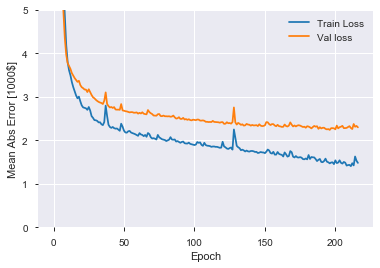

In [17]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Store training stats
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_test,y_test), batch_size=32,
                    callbacks=[early_stop,PrintDot()])

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

This result is not very good and gives us a mean absolute error just above 20000 dollars. I beleive this model performs bad due to the fact that we have a quite small data-set becuase a neural network performs the best when having a big dataset.

In [18]:
# Needed to install the plotly package - can be done from the command line by entering conda install 
# -c https://conda.anaconda.org/plotly plotly
import plotly.graph_objs as go


fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

[Text(0, 0.5, 'Actual house prices($)'),
 Text(0.5, 0, 'Predicted house prices($)'),
 Text(0.5, 1.0, 'Model Predictions on Test data')]

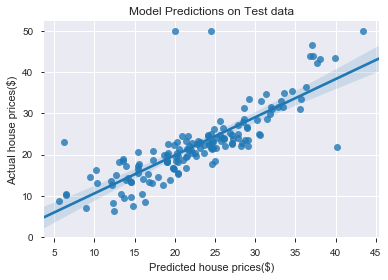

In [20]:
# Linear regression model on the training set
lm = LinearRegression()
lm.fit(X_train, y_train)

# Output prediction on test set
g = sns.regplot(y=y_test,x=lm.predict(X_test),fit_reg=True)
g.set(xlabel='Predicted house prices($)',ylabel='Actual house prices($)',title='Model Predictions on Test data')


###  Evaluate Model

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0). 

The mean square error (MSE) is what will evaluate the algorithm as it will generate an idea of how incorrect the predictions are. The ideal MSE is not zero, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data.  The MSE will basically check what the difference is between the actual value and the predicted value. The mean square error that is returned as part of my testing isn’t very good as it is very high.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

In [21]:
mae = model.evaluate(X_test, y_test)[1]
print("Testing set Mean Abs Error: is{:7.2f}".format(mae),"or","${:7.2f}".format(mae * 1000),)

152/152 [==============================] - 0s 0us/step
Testing set Mean Abs Error: is   2.30 or $2299.08


In [22]:
# Evaluate our model

# https://www.youtube.com/watch?v=ZeM2tHtjGy4

mse, mae= model.evaluate(X_test, y_test)
score = r2_score(y_test, model.predict(X_test))

sum_price = y_train.sum()+y_test.sum()
sum_houses= y_train.size+y_test.size # 506 columns in the CSV file

print("\nr2_score: ", score, "\n")

print("Testing set Mean Square Error: %.2f "% (mse))
#print("Testing set Mean Square Error: ${:7.2f}".format(mse*1000))

print("\nTesting set Mean Abs Error: %.2f "% (mae))
#print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

from sklearn import metrics
print('\nRMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

152/152 [==============================] - 0s 0us/step

r2_score:  0.8183705812044478 

Testing set Mean Square Error: 13.40 

Testing set Mean Abs Error: 2.30 

RMSE: 3.6611818155234204


In [23]:
score = r2_score(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.8183705812044478
mae:  2.2990783220843265
mse:  13.404252286319368


We are still off by about \$2,700 (MAE)

***

### Making Predictions

In [30]:
# Use all 13 predictors to fit linear regression model
lm.fit_intercept=False
lm.fit(X, boston.MEDV)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [31]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 0.0


In [32]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


EXPLAIN COFFICIENTS

In [33]:

# Features and thier respective coefficients
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

features  estimatedCoefficients
0      CRIM              -0.092897
1        ZN               0.048715
2     INDUS              -0.004060
3      CHAS               2.853999
4       NOX              -2.868436
5        RM               5.928148
6       AGE              -0.007269
7       DIS              -0.968514
8       RAD               0.171151
9       TAX              -0.009396
10  PTRATIO              -0.392191
11        B               0.014906
12    LSTAT              -0.416304

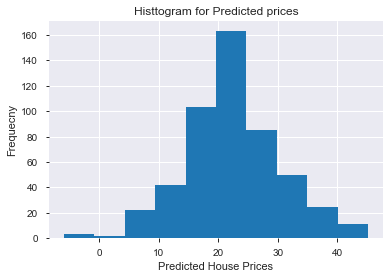

In [34]:
# Histogram: Plot a histogram of all the predicted prices
plt.hist(x=lm.predict(X))
plt.xlabel('Predicted House Prices')
plt.ylabel('Frequecny')
plt.title('Histtogram for Predicted prices')
plt.show()

[Text(0, 0.5, 'Actual House Prices($)'),
 Text(0.5, 0, 'Predicted House Prices($)')]

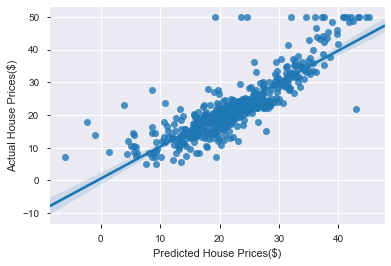

In [35]:
# Scatter Plot between true prices and predicted prices 
scatter = sns.regplot(y='MEDV', x=lm.predict(X), data=boston,fit_reg=True)
scatter.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)')

In [36]:
print(np.sum((boston.MEDV - lm.predict(X)) ** 2))

12228.046261044004


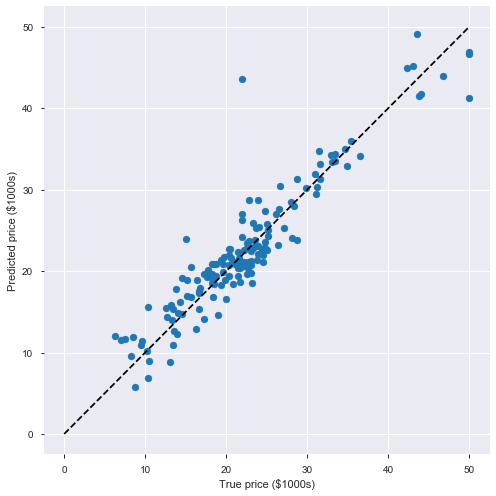

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(7, 7))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [38]:
# first five predicted prices
print(lm.predict(X)[0:5])

[29.09826353 24.50227548 31.22742641 29.7071035  29.56479572]


In [39]:

#Check the predicted price and the actual prices using the linear regression model

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

predicted_house_price = linear_model.predict(X_test)

predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print((predicted_dataframe)[0:5])

     Predicted_Prices  Actual_Prices
357         23.131416           21.7
337         19.042361           18.5
327         19.906675           22.2
13          19.133631           20.4
418          5.639872            8.8


## Most Important Features using SHAP

We can use plot the features using SHAP(SHapley Additive exPlanation) to view which are the most important features with the dataset. SHAP is a very popular library that is used for model explainability. Shapley values consider all possible predictions for an instance using all possible combinations of inputs. Because of this exhaustive approach, SHAP can guarantee properties like consistency and local accuracy. <i>(Poduska, 2019)</i>.

When using SHAP on KNN it produced a warning that by having over five hundred background data samples it could cause much slower run times and that I should consider using shap.kmeans(data, K) to summarise the background. Once this was implemented the running time was reduced to a few minutes as this will summarise the data using a k-means algorithm but I will have to sacrifice some accuracy and reliability.  

The k-Nearest neighbours algorithm is used for regression and classification problems. It is a powerful tool to use when little or no knowledge is know about the distribution of data. According to (scikit-learn video #4: Model training and prediction with K-nearest neighbors, 2019) "KNN can predict the response class for a future observation by calculating the "distance" to all training observations and assuming that the response class of nearby observations is likely to be similar."

When we use a scikitlearn training module they are all implemented in the estimator classes. When the algorithm has extracted the required information from the training data it will be stored in the knn object.

n_neighbors specifies the number of neighbor points to be considered. Knn is called a lazy learner because it does not really get trained but will take all of the data with it as it tests each attribute.

knn.fit takes in the feature matrix named X_train and the response vector named y_train.

In [24]:
# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

# building the kmeans summary
X_train_summary = shap.kmeans(X_train, 10)
 
# Start time counter
start_time = time.time()

# Object to calculate shap values & use kmeans
explainerKNN = shap.KernelExplainer(knn.predict,X_train_summary)

# Calculate the Shap values
shap_values = explainerKNN.shap_values(X_test)

# End time counter
end_time = time.time()

# Calculate amount of time
total_time=end_time-start_time

# Print amount of time
print("The amount of time this took to run is :",total_time, "seconds")


The amount of time this took to run is : 56.90090584754944 seconds


The following plot will use SHAP to show the distributions of each feature. The colour is a representation of the feature value where red will be high and blue will be low). From the output we can see where LSTAT (% lower status of the population) is high it will lower the predicted price<i> of</i> a home. <i>(Poduska, 2019), (platform)? et al., 2019)</i>

To interpret the following SHAP plots we find the predict which in this case in 31.00 with a base value of 20.39. Looking at the pot we can see different colours that represent different things, features are in pink and blue. The pink features are what is causing the increased predictions while the blue features are decreasing the predictions. We can see that CHAS has the biggest impact at 3.475. On the blue side the largest impact comes from INDUS at 0.9947 but because it is much smaller than CHAS it does not have any meaningful effect when decreasing the prediction. <i>(Kaggle.com, 2019)</i>

In [25]:
# Plot the SHAP explainer
shap.force_plot(explainerKNN.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [26]:
# visualize the training set predictions by selected from the dropdown boxes
shap.force_plot(explainerKNN.expected_value, shap_values, X_test)

The following plot is a demonstration of how one feature effects the output of the model. The plot I have used will predicted the house price as RM changes. SHAPs dependence_plot will automatically seperate the output on the graph by changing its colour to highlights if the average number of rooms per house has more or less impact on home price. 

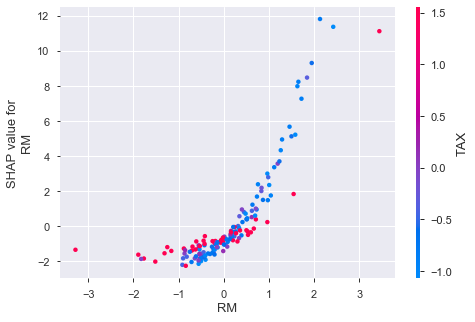

In [27]:
# Effect one feature has over the whole dataset
shap.dependence_plot("RM", shap_values, X_test, dot_size=20)

The following plot is a general overview of the most import features by sorting the features and finding the sum of SHAP. From the plot we can see that a high LSTAT lowers the predicted home price and that a high RM will increase the predicted home price.

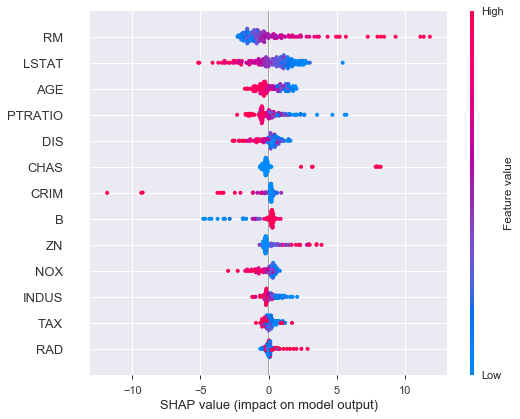

In [28]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

The below explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue (these force plots are introduced in our Nature BME paper).

If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

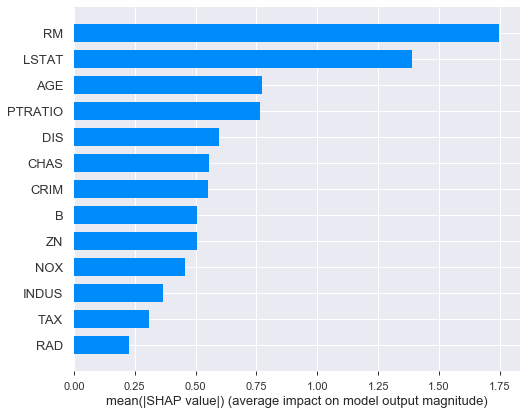

In [29]:
shap.summary_plot(shap_values, X, plot_type="bar")